## Intro to Logistic Regression  
A Logistic Regression algorithm works by implementing a linear equation with independent or explanatory variables to predict a response value. E.g. with just one explanatory variable ($x_1$)  
$z = \beta_0 + \beta_1x_1$  
where $z$ is the target variable / response variable, and $\beta_1$ & $\beta_2$ are the parameters of the model  
If there are multiple explanatory variables, this is extended to  
$z = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$  

**Sigmoid function**  
z is converted to a probability value between 0 and 1. The sigmoid function maps predicted values to probability values. It is given by the following formula:  
$\phi = \frac{1}{1+e^{-z}}$  

**Decision boundary**  
The probability value is mapped to either 0 or 1 based on whether it is above or below a threshold value, or the decision boundary.  
$p \geq 0.5 \therefore$ class $= 1$  
$p < 0.5 \therefore$ class $= 0$  

**Assumptions**
* Dependent variable is binary, multinomial or ordinal
* Observations are independent
* Little to no multicollinearity between independent variables
* Linearity of independent variables
* Success of model depends on sample size

**Types**  
1. Binary logistical regression - target variable has two possible categories (e.g. yes or no, true or false, pass or fail)
2. Multinomial logistical regression - 3+ categories in no particular order
3. Ordinal logistical regression - 3+ categories with intrinsic order (e.g. poor, average, good and excellent)

## Importing libraries and data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
data = '/home/uxue/projects/EPQ/weatherAUS.csv'

df = pd.read_csv(data)

## Preparing data

In [4]:
df.shape

(145460, 23)

In [5]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
col_names = df.columns

col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

If Dtype is *object*, the variable is categorical.  
If Dtype is *float64*, the variable is numerical.

In [8]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are:', categorical)

There are 7 categorical variables

The categorical variables are: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [9]:
# view categorical variables

df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


* There are six categorical variables: location, windgustdir, winddir9am, winddir3pm, raintoday, raintomorrow
* There are two binary categorical variables: raintoday, raintomorrow
* Raintomorrow is the target variable

### Problems within categorical variables
**Missing values within categorical variables**

In [10]:
df[categorical].isnull().sum()

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [11]:
# print categorical variables containing missing values

cat1 = [var for var in categorical if df[var].isnull().sum() != 0]

print(df[cat1].isnull().sum())

WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64


**Frequency counts of categorical variabless**

In [12]:
for var in categorical:

    print(df[var].value_counts())

Date
2013-11-12    49
2014-09-01    49
2014-08-23    49
2014-08-24    49
2014-08-25    49
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2008-01-31     1
Name: count, Length: 3436, dtype: int64
Location
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAA

In [13]:
# view frequency distribution of categorical variables

for var in categorical:

    print(df[var].value_counts()/float(len(df)))

Date
2013-11-12    0.000337
2014-09-01    0.000337
2014-08-23    0.000337
2014-08-24    0.000337
2014-08-25    0.000337
                ...   
2007-11-29    0.000007
2007-11-28    0.000007
2007-11-27    0.000007
2007-11-26    0.000007
2008-01-31    0.000007
Name: count, Length: 3436, dtype: float64
Location
Canberra            0.023622
Sydney              0.022989
Darwin              0.021951
Melbourne           0.021951
Brisbane            0.021951
Adelaide            0.021951
Perth               0.021951
Hobart              0.021951
Albany              0.020899
MountGambier        0.020899
Ballarat            0.020899
Townsville          0.020899
GoldCoast           0.020899
Cairns              0.020899
Launceston          0.020899
AliceSprings        0.020899
Bendigo             0.020899
Albury              0.020899
MountGinini         0.020899
Wollongong          0.020899
Newcastle           0.020892
Tuggeranong         0.020892
Penrith             0.020892
Woomera             0.02

In [14]:
# check for cardinality (no. of labels in a variable) - we don't want this to be high

for var in categorical:

    print(var, 'contains', len(df[var].unique()), 'labels')

Date contains 3436 labels
Location contains 49 labels
WindGustDir contains 17 labels
WindDir9am contains 17 labels
WindDir3pm contains 17 labels
RainToday contains 3 labels
RainTomorrow contains 3 labels


In [15]:
# preprocess Date as it has high cardinality

df['Date'].dtypes

dtype('O')

In [16]:
# 0 means that it is an object

# make the dates (currently strings) into datetime format

df['Date'] = pd.to_datetime(df['Date'])

In [17]:
# extract year from date

df['Year'] = df['Date'].dt.year

df['Year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int32

In [18]:
# extract month from date

df['Month'] = df['Date'].dt.month

df['Month'].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int32

In [19]:
# extract day from date

df['Day'] = df['Date'].dt.day

df['Day'].head()

0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int32

In [20]:
# summary of dataset again

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

Three additional columns now - Year, Month, Day

In [21]:
# drop (ie delete) initial Date variable

df.drop('Date', axis=1, inplace = True)

In [22]:
# preview dataset again

df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


## Explore categorical variables

In [23]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 6 categorical variables

The categorical variables are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


Date has been removed so the number of categorical variables has decreased by 1

In [24]:
# check for missing values

df[categorical].isnull().sum()

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

**Explore *Location* variable**

In [25]:
# no. of labels in Location variable

print('Location contains', len(df['Location'].unique()), 'labels')

Location contains 49 labels


In [26]:
# check labels

df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [27]:
# check frequency distribution of values

df.Location.value_counts()

Location
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown     

In [28]:
# make Location variable into 1s and 0s

pd.get_dummies(df.Location, drop_first=True, dtype=int).head() # default dtype is bool (T or F) so int makes it into 1 or 0

,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Explore *WintGustDir* variable**

In [29]:
# no. of labels

print('WintGustDir contains', len(df['WindGustDir'].unique()), 'labels')

WintGustDir contains 17 labels


In [30]:
# check labels

df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [31]:
# check frequency distribution

df.WindGustDir.value_counts()

WindGustDir
W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: count, dtype: int64

In [32]:
# encode this into dummy variables too (1s and 0s), inc extra dummy variable to indicate missing data

pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True, dtype=int).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [33]:
# sum no. of 1s per variable over the rows, which tells us no. of observations for each category

observations = pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).sum(axis=0)
observations

ENE     8104
ESE     7372
N       9313
NE      7133
NNE     6548
NNW     6620
NW      8122
S       9168
SE      9418
SSE     9216
SSW     8736
SW      8967
W       9915
WNW     8252
WSW     9069
NaN    10326
dtype: int64

Thus there are 10326 missing values in WindGustDir variable

**Explore *WindDir9am* variable**

In [34]:
# print no. of labels

print('WindDir9am contains', len(df.WindDir9am.unique()), 'labels')

WindDir9am contains 17 labels


In [35]:
# check labels

df.WindDir9am.unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [36]:
# frequency distribution

df.WindDir9am.value_counts()

WindDir9am
N      11758
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: count, dtype: int64

In [37]:
WindDir9am_dummies = pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True, dtype=int)
WindDir9am_dummies.head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
WindDir9am_dummies.sum(axis=0)

ENE     7836
ESE     7630
N      11758
NE      7671
NNE     8129
NNW     7980
NW      8749
S       8659
SE      9287
SSE     9112
SSW     7587
SW      8423
W       8459
WNW     7414
WSW     7024
NaN    10566
dtype: int64

There are 10566 missing values from WindDir9am

**Exploring *WindDir3pm* variable**

In [39]:
# no. of labels

def len_labels(field):

    var = df[field]
    print(field, 'contains', len(var.unique()), 'labels')

len_labels('WindDir3pm') # <?>

WindDir3pm contains 17 labels


In [40]:
def labels(field):

    var = df[field]
    print(var.unique())

labels('WindDir3pm')

['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']


In [41]:
df.WindDir3pm.value_counts()

def freq_dist(field): # frequency distribution
    
    var = df[field]    
    print(var.value_counts())

freq_dist('WindDir3pm')

WindDir3pm
SE     10838
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
Name: count, dtype: int64


In [42]:
def dummies(field):

    var = df[field]
    return pd.get_dummies(var, drop_first=True, dummy_na=True, dtype=int)

dummies('WindDir3pm').head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [43]:
dummies('WindDir3pm').sum(axis=0)

ENE     7857
ESE     8505
N       8890
NE      8263
NNE     6590
NNW     7870
NW      8610
S       9926
SE     10838
SSE     9399
SSW     8156
SW      9354
W      10110
WNW     8874
WSW     9518
NaN     4228
dtype: int64

**Exploring *RainToday* variable**

In [44]:
len_labels('RainToday')

RainToday contains 3 labels


In [45]:
labels('RainToday')

['No' 'Yes' nan]


In [46]:
df.RainToday.value_counts()

RainToday
No     110319
Yes     31880
Name: count, dtype: int64

In [47]:
dummies('RainToday').head()

,Yes,NaN
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [48]:
dummies('RainToday').sum(axis=0)

Yes    31880
NaN     3261
dtype: int64

There are 3261 missing values in the RainToday variable

## Numerical variables

In [49]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables'.format(len(numerical)))

print('The numerical variables are', numerical)

There are 19 numerical variables
The numerical variables are ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [50]:
# view numerical variables

df[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008,12,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008,12,2
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008,12,3
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008,12,4
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008,12,5


## Problems within numerical variables

**Missing values**

In [51]:
df[numerical].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
Year                 0
Month                0
Day                  0
dtype: int64

16 out of 19 have missing values

**Outliers**

In [52]:
# summary stats

print(round(df[numerical].describe(), 2))

         MinTemp    MaxTemp   Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  143975.00  144199.00  142199.00     82670.00  75625.00      135197.00   
mean       12.19      23.22       2.36         5.47      7.61          40.04   
std         6.40       7.12       8.48         4.19      3.79          13.61   
min        -8.50      -4.80       0.00         0.00      0.00           6.00   
25%         7.60      17.90       0.00         2.60      4.80          31.00   
50%        12.00      22.60       0.00         4.80      8.40          39.00   
75%        16.90      28.20       0.80         7.40     10.60          48.00   
max        33.90      48.10     371.00       145.00     14.50         135.00   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count     143693.00     142398.00    142806.00    140953.00    130395.00   
mean          14.04         18.66        68.88        51.54      1017.65   
std            8.92          8.81        19.03     

Windspeed, rainfall and evaporation seem to have outliers - draw a box plot to visualise this

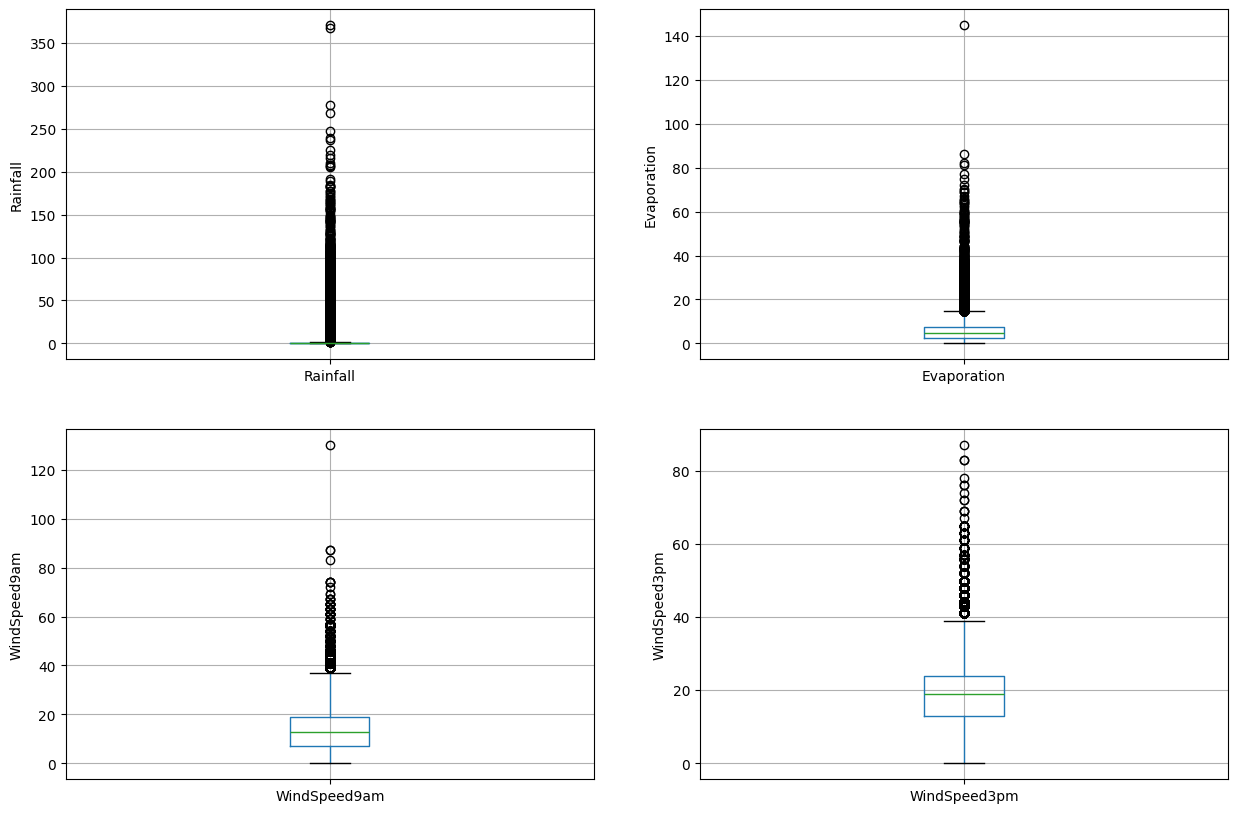

In [53]:
plt.figure(figsize=(15,10))

def boxplot(n, field):

    var = df[field]
    plt.subplot(2, 2, n)
    fig = df.boxplot(column=field)
    fig.set_title('')
    fig.set_ylabel(field)

boxplot(1, 'Rainfall')
boxplot(2, 'Evaporation')
boxplot(3, 'WindSpeed9am')
boxplot(4, 'WindSpeed3pm')

These plots confirm that there are a lot of outliers in these variables!

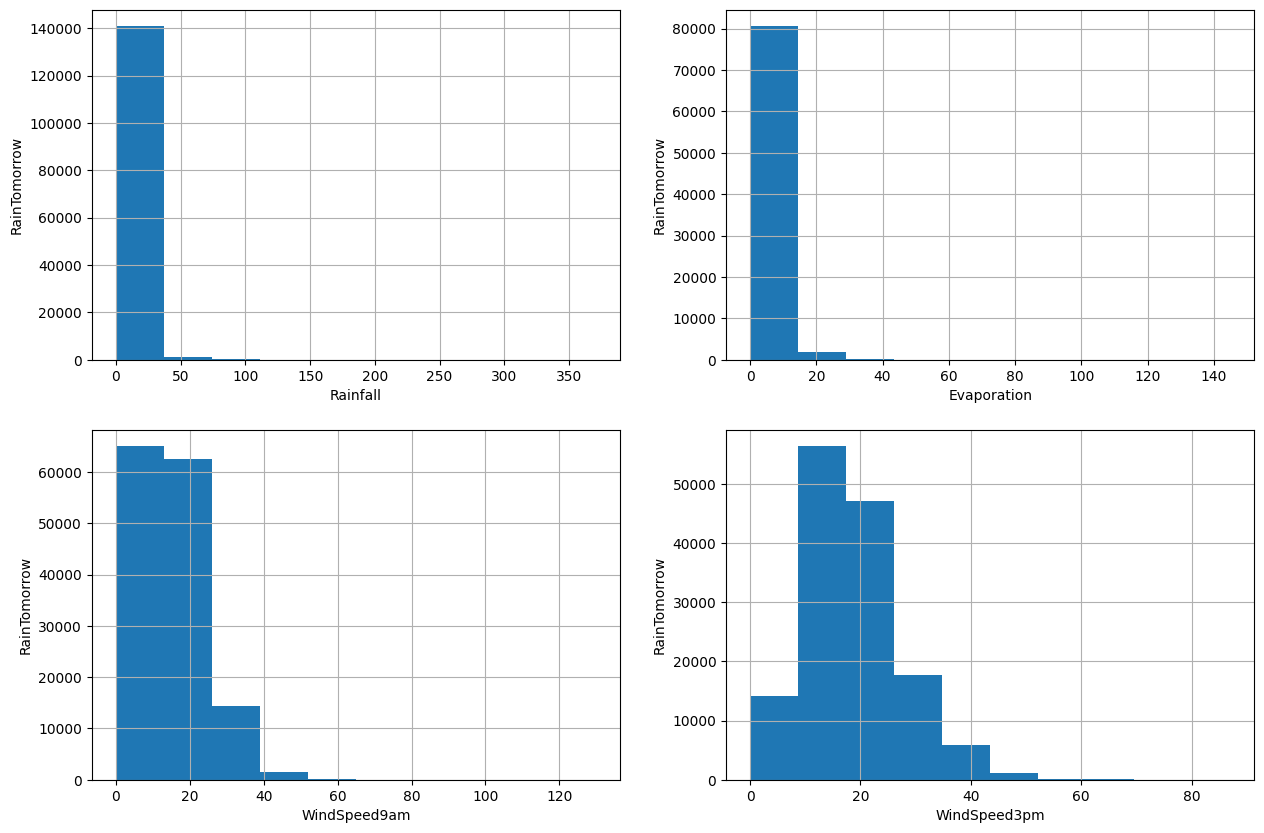

In [54]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))

def histogram(n, field):

    var = df[field]
    plt.subplot(2, 2, n)
    fig = var.hist(bins=10)
    fig.set_xlabel(field)
    fig.set_ylabel('RainTomorrow')

histogram(1, 'Rainfall')
histogram(2, 'Evaporation')
histogram(3, 'WindSpeed9am')
histogram(4, 'WindSpeed3pm')

All four variables are skewed and not of normal distribution, so we will use the interquartile range to find outliers

In [55]:
# find outliers for Rainfall

def iqr(field):

    var = df[field]
    IQR = var.quantile(0.75) - var.quantile(0.25)
    Lower_fence = var.quantile(0.25) - (IQR * 3)
    Upper_fence = var.quantile(0.75) + (IQR * 3)
    print(f'{field} outliers are values < {Lower_fence} or > {Upper_fence}')

iqr('Rainfall')

Rainfall outliers are values < -2.4000000000000004 or > 3.2


$0.0 \leq$ Rainfall $\leq 3.72$ so outliers $> 3.2$

In [56]:
iqr('Evaporation')

Evaporation outliers are values < -11.800000000000002 or > 21.800000000000004


$0.0 \leq$ Evaporation $\leq 145.0$ so outliers $> 21.8$

In [57]:
iqr('WindSpeed9am')

WindSpeed9am outliers are values < -29.0 or > 55.0


$0.0 \leq$ WindSpeed9am $\leq 130.0$ so outliers $> 55.0$

In [58]:
iqr('WindSpeed3pm')

WindSpeed3pm outliers are values < -20.0 or > 57.0


$0.0 \leq$ Rainfall $\leq 87.0$ so outliers $> 57.0$

## Declare vector and target variable

In [59]:
X = df.drop(['RainTomorrow'], axis=1)

y = df['RainTomorrow']

## Split data into training and test set

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [61]:
X_train.shape, X_test.shape

((116368, 24), (29092, 24))

## Feature engineering

In [62]:
X_train.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
Year               int32
Month              int32
Day                int32
dtype: object

In [63]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [64]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

**Engineering missing variables in numerical variables**

In [65]:
X_train[numerical].isnull().sum()

MinTemp           1183
MaxTemp           1019
Rainfall          2617
Evaporation      50355
Sunshine         55899
WindGustSpeed     8218
WindSpeed9am      1409
WindSpeed3pm      2456
Humidity9am       2147
Humidity3pm       3598
Pressure9am      12091
Pressure3pm      12064
Cloud9am         44796
Cloud3pm         47557
Temp9am           1415
Temp3pm           2865
Year                 0
Month                0
Day                  0
dtype: int64

In [66]:
X_test[numerical].isnull().sum()

MinTemp            302
MaxTemp            242
Rainfall           644
Evaporation      12435
Sunshine         13936
WindGustSpeed     2045
WindSpeed9am       358
WindSpeed3pm       606
Humidity9am        507
Humidity3pm        909
Pressure9am       2974
Pressure3pm       2964
Cloud9am         11092
Cloud3pm         11801
Temp9am            352
Temp3pm            744
Year                 0
Month                0
Day                  0
dtype: int64

In [67]:
# print percentage of missing values in numerical variables in training set

for col in numerical:

    if X_train[col].isnull().mean() > 0:

        print(col, round(X_train[col].isnull().mean(), 4))

MinTemp 0.0102
MaxTemp 0.0088
Rainfall 0.0225
Evaporation 0.4327
Sunshine 0.4804
WindGustSpeed 0.0706
WindSpeed9am 0.0121
WindSpeed3pm 0.0211
Humidity9am 0.0185
Humidity3pm 0.0309
Pressure9am 0.1039
Pressure3pm 0.1037
Cloud9am 0.385
Cloud3pm 0.4087
Temp9am 0.0122
Temp3pm 0.0246


In [68]:
# to deal with missing values, fill the missing values with the median - this is called median imputation

for df1 in [X_train, X_test]:

    for col in numerical:

        col_median = X_train[col].median()
        df1[col].fillna(col_median, inplace=True)

In [69]:
X_train[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

Now there are no missing values in X_train

In [70]:
X_test[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

There are also no missing values in X_test

**Engineering missing values in categorical variables**

In [71]:
# % of missing values in categorical vars in training set

X_train[categorical].isnull().mean()

Location       0.000000
WindGustDir    0.071068
WindDir9am     0.072597
WindDir3pm     0.028951
RainToday      0.022489
dtype: float64

In [72]:
for col in categorical:

    if X_train[col].isnull().mean() > 0:

        print(col, (X_train[col].isnull().mean()))

WindGustDir 0.07106764746322013
WindDir9am 0.07259727760208992
WindDir3pm 0.028951258077822083
RainToday 0.02248900041248453


In [73]:
# missing values are filled in with the most frequent value (mode)

#var = df2[field]
#impute = var.fillna(X_train[field].mode()[0], inplace=True)

for df2 in [X_train, X_test]:

    df2['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    df2['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    df2['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
    df2['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

In [74]:
X_train[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [75]:
X_test[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [76]:
# checking for missing values in whole of training and testing sets

X_train.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

In [77]:
X_test.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

**Engineering outliers in numerical variables**  
Rainfall, Evaporation, WindSpeed9am and WindSpeed3am contain outliers. These will be removed by capping maximum values.

In [78]:
def max_value(df3, variable, top):

    return np.where(df3[variable] > top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57)

In [79]:
X_train.Rainfall.max(), X_test.Rainfall.max()

(3.2, 3.2)

In [80]:
X_train.Evaporation.max(), X_test.Evaporation.max()

(21.8, 21.8)

In [81]:
X_train.WindSpeed9am.max(), X_test.WindSpeed9am.max()

(55.0, 55.0)

In [82]:
X_train.WindSpeed3pm.max(), X_test.WindSpeed3pm.max()

(57.0, 57.0)

In [83]:
X_train[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000
mean,12.190189,23.203107,0.670800,5.093362,7.982476,39.982091,14.029381,18.687466,68.950691,51.605828,1017.639891,1015.244946,4.664092,4.710728,16.979454,21.657195,2012.767058,6.395091,15.731954
std,6.366893,7.085408,1.181512,2.800200,2.761639,13.127953,8.835596,8.700618,18.811437,20.439999,6.728234,6.661517,2.280687,2.106040,6.449641,6.848293,2.538401,3.425451,8.796931
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,2007.000000,1.000000,1.000000
25%,7.700000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.100000,3.000000,4.000000,12.300000,16.700000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.700000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.600000,5.200000,8.600000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.200000,2015.000000,9.000000,23.000000
max,31.900000,48.100000,3.200000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,8.000000,40.200000,46.700000,2017.000000,12.000000,31.000000


Can now see that outliers in Rainfall, Evaporation, WindSpeed9am and WindSpeed3pm are capped

**Encode categorical variables**

In [84]:
categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [85]:
X_train[categorical].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
22926,NorfolkIsland,ESE,ESE,ESE,No
80735,Watsonia,NE,NNW,NNE,No
121764,Perth,SW,N,SW,Yes
139821,Darwin,ESE,ESE,E,No
1867,Albury,E,ESE,E,Yes


In [86]:
# encode RainToday

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['RainToday'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [87]:
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Year,Month,Day
22926,NorfolkIsland,18.8,23.7,0.2,5.0,7.3,ESE,52.0,ESE,ESE,...,1013.9,5.0,7.0,21.4,22.2,0,1,2014,3,12
80735,Watsonia,9.3,24.0,0.2,1.6,10.9,NE,48.0,NNW,NNE,...,1014.6,3.0,5.0,14.3,23.2,0,1,2016,10,6
121764,Perth,10.9,22.2,1.4,1.2,9.6,SW,26.0,N,SW,...,1014.9,1.0,2.0,16.6,21.5,1,0,2011,8,31
139821,Darwin,19.3,29.9,0.0,9.2,11.0,ESE,43.0,ESE,E,...,1012.1,1.0,1.0,23.2,29.1,0,1,2010,6,11
1867,Albury,15.7,17.6,3.2,4.7,8.4,E,20.0,ESE,E,...,1010.5,8.0,8.0,16.5,17.3,1,0,2014,4,10


RainToday has been made into RainToday_0 and RainToday_1

In [88]:
X_train = pd.concat([X_train[numerical], X_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_train.Location, dtype=int),
                     pd.get_dummies(X_train.WindGustDir, dtype=int),
                     pd.get_dummies(X_train.WindDir9am, dtype=int),
                     pd.get_dummies(X_train.WindDir3pm, dtype=int)], axis = 1)

In [89]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
22926,18.8,23.7,0.2,5.0,7.3,52.0,31.0,28.0,74.0,73.0,...,0,0,0,0,0,0,0,0,0,0
80735,9.3,24.0,0.2,1.6,10.9,48.0,13.0,24.0,74.0,55.0,...,0,0,0,0,0,0,0,0,0,0
121764,10.9,22.2,1.4,1.2,9.6,26.0,0.0,11.0,85.0,47.0,...,0,0,0,0,0,0,1,0,0,0
139821,19.3,29.9,0.0,9.2,11.0,43.0,26.0,17.0,44.0,37.0,...,0,0,0,0,0,0,0,0,0,0
1867,15.7,17.6,3.2,4.7,8.4,20.0,11.0,13.0,100.0,100.0,...,0,0,0,0,0,0,0,0,0,0


X_train dataset created!

In [90]:
X_test = pd.concat([X_test[numerical], X_test[['RainToday_0', 'RainToday_1']],
                    pd.get_dummies(X_test.Location, dtype=int),
                    pd.get_dummies(X_test.WindGustDir, dtype=int),
                    pd.get_dummies(X_test.WindDir9am, dtype=int),
                    pd.get_dummies(X_test.WindDir3pm, dtype=int)], axis = 1)

In [91]:
X_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
138175,21.9,39.4,1.6,11.2,11.5,57.0,20.0,33.0,50.0,26.0,...,0,0,0,0,0,0,0,0,0,0
38638,20.5,37.5,0.0,9.2,8.4,59.0,17.0,20.0,47.0,22.0,...,0,0,0,0,0,0,0,0,0,0
124058,5.1,17.2,0.2,4.7,8.4,50.0,28.0,22.0,68.0,51.0,...,0,0,0,0,0,0,0,1,0,0
99214,11.9,16.8,1.0,4.7,8.4,28.0,11.0,13.0,80.0,79.0,...,0,0,0,0,0,0,1,0,0,0
25097,7.5,21.3,0.0,4.7,8.4,15.0,2.0,7.0,88.0,52.0,...,0,0,0,0,0,0,0,0,0,0


X_test dataset created!

Now the datasets are ready for model building. First we need to map all of the feature variables onto the same scale - feature scaling.

## Feature scaling

In [92]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,...,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000
mean,12.190189,23.203107,0.670800,5.093362,7.982476,39.982091,14.029381,18.687466,68.950691,51.605828,...,0.054078,0.059123,0.068447,0.103723,0.065224,0.056055,0.064786,0.069323,0.060309,0.064958
std,6.366893,7.085408,1.181512,2.800200,2.761639,13.127953,8.835596,8.700618,18.811437,20.439999,...,0.226173,0.235855,0.252512,0.304902,0.246922,0.230029,0.246149,0.254004,0.238059,0.246452
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.700000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,22.600000,0.000000,4.700000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.800000,28.200000,0.600000,5.200000,8.600000,46.000000,19.000000,24.000000,83.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,31.900000,48.100000,3.200000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [93]:
cols = X_train.columns

In [94]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [95]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [96]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [97]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,...,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000
mean,0.512133,0.529359,0.209625,0.233640,0.550516,0.263427,0.255080,0.327850,0.689507,0.516058,...,0.054078,0.059123,0.068447,0.103723,0.065224,0.056055,0.064786,0.069323,0.060309,0.064958
std,0.157596,0.133940,0.369223,0.128450,0.190458,0.101767,0.160647,0.152642,0.188114,0.204400,...,0.226173,0.235855,0.252512,0.304902,0.246922,0.230029,0.246149,0.254004,0.238059,0.246452
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400990,0.431002,0.000000,0.183486,0.565517,0.193798,0.127273,0.228070,0.570000,0.370000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.507426,0.517958,0.000000,0.215596,0.579310,0.255814,0.236364,0.333333,0.700000,0.520000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.626238,0.623819,0.187500,0.238532,0.593103,0.310078,0.345455,0.421053,0.830000,0.650000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


X_train dataset is now ready

## Model training!

### Removing missing values in both X_train and y_train

In [98]:
X_train.shape

(116368, 118)

In [99]:
y_train.head()

22926     Yes
80735      No
121764     No
139821     No
1867      Yes
Name: RainTomorrow, dtype: object

In [100]:
y_train = y_train.reset_index(drop=True) # making sure numbers are in correct order for both, so that they can be merged
X_train = X_train.reset_index(drop=True)
y_train = pd.get_dummies(y_train, dtype=int) # making Yes & No into 1s & 0s

y_train = y_train.drop(['No'], axis=1) # because for some reason get_dummies makes it into a Yes column and a No column which are the exact opposite of each other
y_train.head()

,Yes
0,1
1,0
2,0
3,0
4,1


In [101]:
df3 = pd.concat([X_train, y_train], axis=1)
df3.head()

,"(MinTemp,)","(MaxTemp,)","(Rainfall,)","(Evaporation,)","(Sunshine,)","(WindGustSpeed,)","(WindSpeed9am,)","(WindSpeed3pm,)","(Humidity9am,)","(Humidity3pm,)",...,"(NW,)","(S,)","(SE,)","(SSE,)","(SSW,)","(SW,)","(W,)","(WNW,)","(WSW,)",Yes
0,0.675743,0.538752,0.0625,0.229358,0.503448,0.356589,0.563636,0.491228,0.74,0.73,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.440594,0.544423,0.0625,0.073394,0.751724,0.325581,0.236364,0.421053,0.74,0.55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.480198,0.510397,0.4375,0.055046,0.662069,0.155039,0.000000,0.192982,0.85,0.47,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
3,0.688119,0.655955,0.0000,0.422018,0.758621,0.286822,0.472727,0.298246,0.44,0.37,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.599010,0.423440,1.0000,0.215596,0.579310,0.108527,0.200000,0.228070,1.00,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [102]:
df3 = df3.dropna()
df3.head()

,"(MinTemp,)","(MaxTemp,)","(Rainfall,)","(Evaporation,)","(Sunshine,)","(WindGustSpeed,)","(WindSpeed9am,)","(WindSpeed3pm,)","(Humidity9am,)","(Humidity3pm,)",...,"(NW,)","(S,)","(SE,)","(SSE,)","(SSW,)","(SW,)","(W,)","(WNW,)","(WSW,)",Yes
0,0.675743,0.538752,0.0625,0.229358,0.503448,0.356589,0.563636,0.491228,0.74,0.73,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.440594,0.544423,0.0625,0.073394,0.751724,0.325581,0.236364,0.421053,0.74,0.55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.480198,0.510397,0.4375,0.055046,0.662069,0.155039,0.000000,0.192982,0.85,0.47,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
3,0.688119,0.655955,0.0000,0.422018,0.758621,0.286822,0.472727,0.298246,0.44,0.37,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.599010,0.423440,1.0000,0.215596,0.579310,0.108527,0.200000,0.228070,1.00,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [103]:
y_train = df3[['Yes']]
X_train = df3.drop(['Yes'], axis=1)
X_train.head()

,"(MinTemp,)","(MaxTemp,)","(Rainfall,)","(Evaporation,)","(Sunshine,)","(WindGustSpeed,)","(WindSpeed9am,)","(WindSpeed3pm,)","(Humidity9am,)","(Humidity3pm,)",...,"(NNW,)","(NW,)","(S,)","(SE,)","(SSE,)","(SSW,)","(SW,)","(W,)","(WNW,)","(WSW,)"
0,0.675743,0.538752,0.0625,0.229358,0.503448,0.356589,0.563636,0.491228,0.74,0.73,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.440594,0.544423,0.0625,0.073394,0.751724,0.325581,0.236364,0.421053,0.74,0.55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.480198,0.510397,0.4375,0.055046,0.662069,0.155039,0.000000,0.192982,0.85,0.47,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.688119,0.655955,0.0000,0.422018,0.758621,0.286822,0.472727,0.298246,0.44,0.37,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.599010,0.423440,1.0000,0.215596,0.579310,0.108527,0.200000,0.228070,1.00,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
y_train = y_train.rename(columns={'Yes':'RainTomorrow'})
y_train.head()

,RainTomorrow
0,1
1,0
2,0
3,0
4,1


### Starting and fitting the model

In [105]:
from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)

# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [106]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([0, 0, 0, ..., 1, 0, 0])

**predict_proba method**

This method gives probability for the target variable.
$0$ is for probability of no rain and $1$ is for probability of rain

In [107]:
logreg.predict_proba(X_test)[:,0]

array([0.83215823, 0.74551076, 0.79860387, ..., 0.42025444, 0.6575465 ,
       0.96954917])

In [108]:
logreg.predict_proba(X_test)[:,1]

array([0.16784177, 0.25448924, 0.20139613, ..., 0.57974556, 0.3424535 ,
       0.03045083])

## Check accuracy score

In [109]:
y_test.head()

138175    Yes
38638     Yes
124058     No
99214      No
25097      No
Name: RainTomorrow, dtype: object

In [110]:
y_test = y_test.reset_index(drop=True)

y_test = np.array([v == 'Yes' for v in y_test])

In [111]:
y_test.astype(int)

array([1, 1, 0, ..., 1, 0, 0])

In [112]:
print(y_pred_test)

[0 0 0 ... 1 0 0]


In [113]:
#y_test = y_test.index.values # make into an array, because accuracy_score requires both to be in array form

In [114]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8484


### Compare train-set and test-set accuracy  
to check for overfitting & underfitting

In [115]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array([0, 0, 0, ..., 0, 0, 0])

In [116]:
print('Training set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training set accuracy score: 0.8488


**Check for overfitting & underfitting**

In [117]:
print('Training set score: {:.4f}'. format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'. format(logreg.score(X_test, y_test)))

Training set score: 0.8488
Test set score: 0.8484


Since these values are comparable there is no question of overfitting. However, the model performance on both training and test set is comparable so it is likely that the model is underfitting.

Logistic regression uses a default value of $C = 1.0$ . Increasing C will mean that model trusts the training data a lot and will fit more closely with the training data, thus it is less likely that the model is underfitting.

In [118]:
# fit the model with C = 100

# instantiate model
logreg100 = LogisticRegression(C = 100, solver = 'liblinear', random_state = 0)

# fit the model
logreg100.fit(X_train, y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [119]:
# print scores on training and test set

print('Training set score: {:.4f}'. format(logreg100.score(X_train, y_train)))

print('Test set score: {:.4f}'. format(logreg100.score(X_test, y_test)))

Training set score: 0.8489
Test set score: 0.8491


This increases the training set score slightly and the test set score by a bit more, so a complex model (one with a higher value of C) should perform better.  
What if we decreased C to 0.01?

In [120]:
logreg001 = LogisticRegression(C = 0.01, solver = 'liblinear', random_state = 0)

logreg001.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [121]:
print('Training set score: {:.4f}'. format(logreg001.score(X_train, y_train)))

print('Test set score: {:.4f}'. format(logreg001.score(X_test, y_test)))

Training set score: 0.8427
Test set score: 0.8418
